<a href="https://colab.research.google.com/github/VladimirGorF/AnalisysDataSetTitanik/blob/master/AnalisysDataSetTitanik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Библиотека для работы с табличными данными
import pandas as pd
# Библиотека для вычислений линейной алгебры
import numpy as np
# Библиотеки для визуализации
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
# Начнем с чтения csv данных
df = pd.read_csv('Titanic.csv')

In [8]:
df.head(10) #  Посмотрим как выглядят первые 10 записей. 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [12]:
df.info()
#  Посмотрим сводную информацию по сету. # В представленном Data Set содержится информация о пассажирах Титаника и о том, что это были за люди на борту судна,
#  где они сели на корабль, какого они были возраста, судьбы и т.п.  Всего у нас 891 пассажир и 12 параметров.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
print(df.isnull().sum()) 
# Посмотрим есть ли пустые значения. Пропущен возраст 177 пасссажиров и номер комнаты 687 пассажиров, а таже место
# посадки двих людей. Номера комнат нам мало что скажут, а вот возраст - это интересный параметр.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [15]:
df.describe()
#  Посмотрим описательную часть сета. Выживаемость составила всего 38%. Средний возраст людей на корабле был 29 лет. 
# Половина путшествовала со своими братьями или сестрами. С родителями и детьми в среднем были 38%. Мединная стоимость
# билета была 14$("это где-то 420$ по сегодняшнему курсу 2022г.)
# Что позволяет сделать вывод, что, в среднем, путешествовавшие были довольно состоятельными гражданами.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
df[['Survived', 'Pclass', 'Age']]
# Можно вывести несколько столбцов данных, но это малоинформативно в итоге.

,Survived,Pclass,Age
0,0,3,22.0
1,1,1,38.0
2,1,3,26.0
3,1,1,35.0
4,0,3,35.0
...,...,...,...
886,0,2,27.0
887,1,1,19.0
888,0,3,NaN
889,1,1,26.0


In [20]:
# Максимальное значение возраста 80 лет.
df['Age'].max()
# Среднее значение стомости билета составило 32$
df['Fare'].mean()
# Минимальное значение 0, но это скорее ошибочные данные.
df['Fare'].min()
 # Максимальное значение 512$ это как сейчас 15 000 $ за билет для богатых людей 1 класса.
df['Fare'].max()
 # Сумма всех билетов составила 28693$ это приблизительно 51 000 000 руб по курсу 2022г.
df['Fare'].sum()

80.0

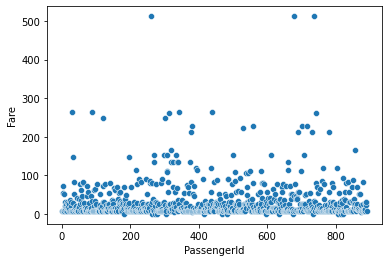

In [18]:

# Изобразив отношение "Age" к "Fare" мы видим что, в основном, спросом пользовались относительно недорогие билеты. И видиим также,
# что совсем молодым или совсем старым на стоимость билет было наплевать, что вобщем логично.
sns.scatterplot(data=df, x="PassengerId", y="Fare")

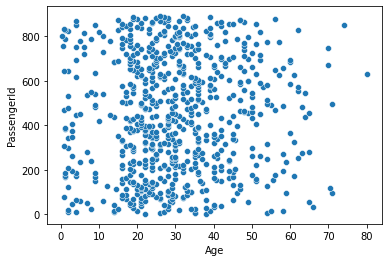

In [13]:
sns.scatterplot(data=df, x="Age", y="PassengerId")
# Больше всего людей было от 15 до 45 лет 

In [6]:
df[(df['Fare'] > 200)]   # Мы видим что дороже 200$ , были билеты только у 20 человек. Причем из них выжили 14.
# df[(df['Fare'] > 100)]     # Более 100$ билеты стоили только у 53 человек. Из них погибло 11 человек. Т.е 20%. Если сравнить со 
#средней выживаемостью в 38%, то явственно видно, что богатые эвакуировались в первую очередь. При чем чем богаче, тем раньше.  


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


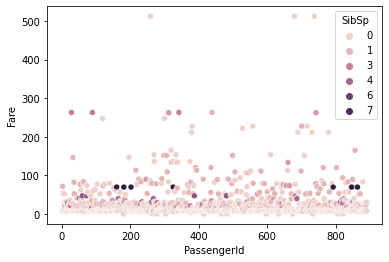

In [12]:
sns.scatterplot(data=df, x="PassengerId", y="Fare",  hue="SibSp")    # на данном графике видно, что большие семьи путешествовали
# преимущественно в ценовой категрии 50-100 долларов, т.е. были довольно обеспеченными.
# 

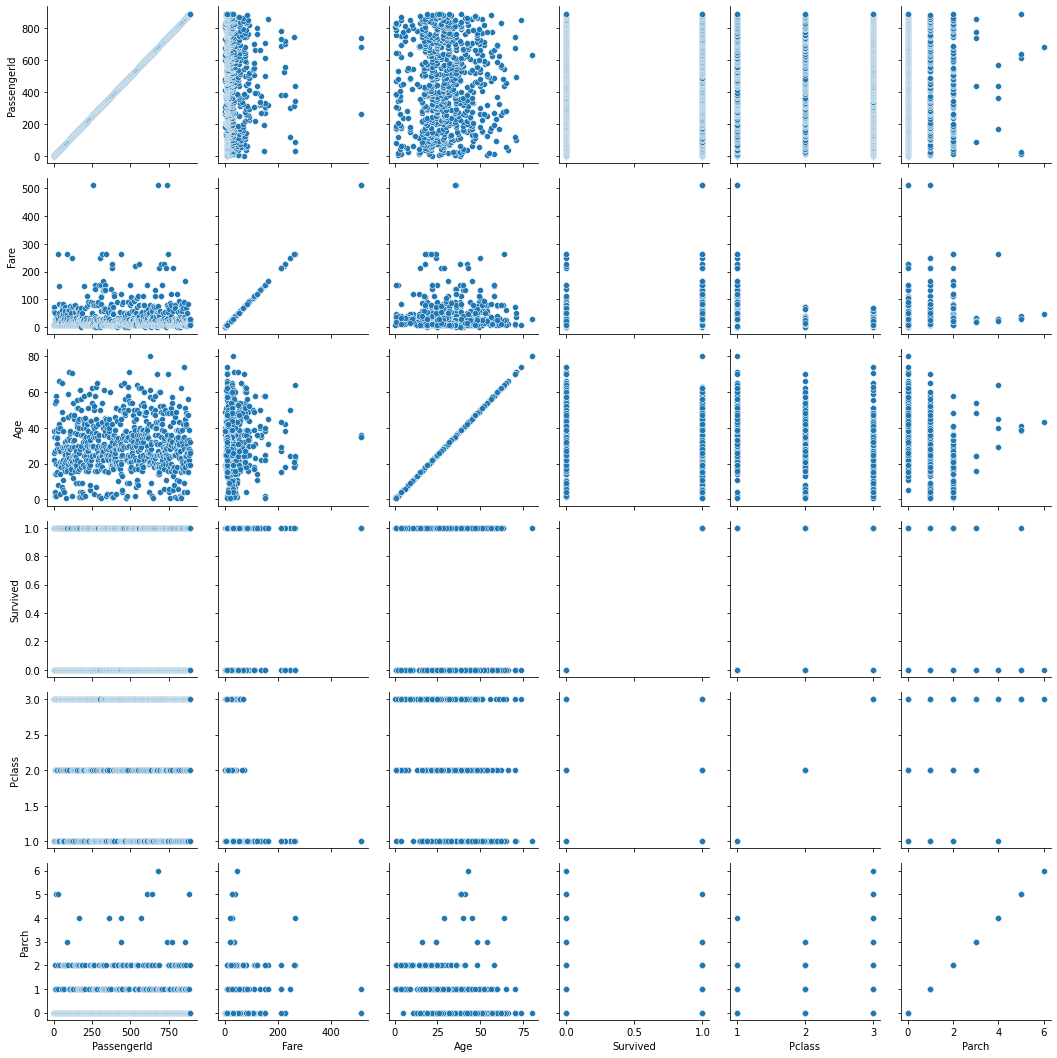

In [13]:
cols = ['PassengerId', 'Fare', 'Age', 'Survived', 'Pclass', 'Parch']
g = sns.PairGrid(df[cols])
g.map(sns.scatterplot)
# А в таком формате предстваления мы видим наглядную картину тех выводов, что уже ранее делали, только вместе взятые теперь все.

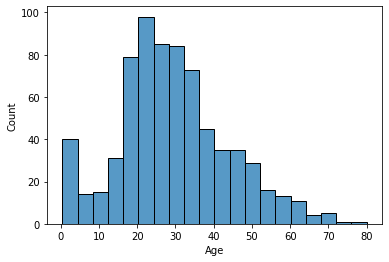

In [20]:
sns.histplot(data=df, x="Age")
# Данная гистограмма показывает распредение пассажиров по возрвастной категории. В основном 15-35 лет.

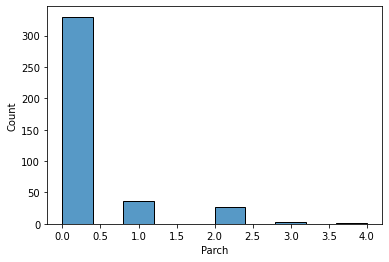

In [23]:
sns.histplot(data=df[( df['Age']<35) & ( df['Age']>15)], x="Parch")

# Вс сегменте от 15 до 35 лет в основном были люди без детей и родителей.


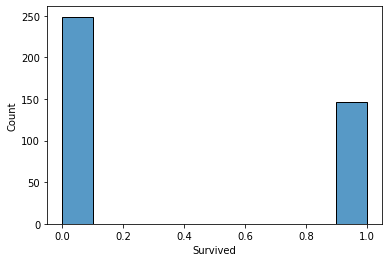

In [25]:
sns.histplot(data=df[( df['Age']<35) & ( df['Age']>15)], x="Survived")

# Вс сегменте от 15 до 35 лет выживаемость была печальной, и соответствовала средней на всем судне.


In [26]:
corr = df.corr()

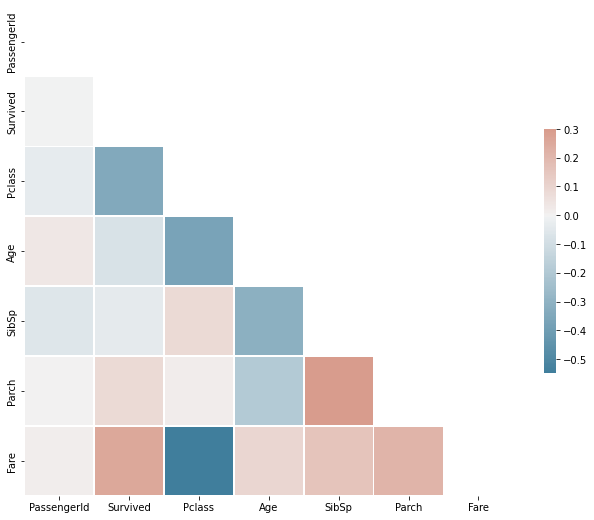

In [27]:
mask = np.triu(np.ones_like(corr, dtype=bool))

# Создаем полотно для отображения большого графика
f, ax = plt.subplots(figsize=(11, 9))

# Создаем цветовую политру
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Визуализируем данные кореляции 
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#. Согласно корелляционным данным можно увидеть следущие закономерности:
# Класс хорошо кореллирует со стоимостью билетов и это доволно очевидный момент, также ведут себя показатели семейности
# и наличие братьев и сестер на судне. Хорошо кореллируют выживаемость и стоимость билета. 
#